## histogram of number of friends

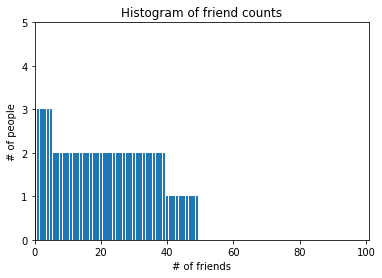

In [2]:
from collections import Counter
import matplotlib.pyplot as plt
import random 

num_friends_initial = [i for i in range(50)]
num_friends_randomizer = [i for i in range(40)]
num_friends_randomizer2 = [i for i in range(5)]
num_friends_randomizer3 = [random.randrange(3, 6)]
num_friends = num_friends_initial + num_friends_randomizer + num_friends_randomizer2 + num_friends_randomizer3
random.shuffle(num_friends)

friend_counts = Counter(num_friends)
xs = range(101)
ys = [friend_counts[x] for x in xs]
plt.bar(xs, ys)
plt.axis([0, 101, 0, 5])
plt.title("Histogram of friend counts")
plt.xlabel("# of friends")
plt.ylabel("# of people")
plt.show()

In [3]:
num_points = len(num_friends)

largest_value = max(num_friends)
smallest_value = min(num_friends)

sorted_values = sorted(num_friends)
smallest_value_with_list = sorted_values[0]

second_smallest_value = sorted_values[1]
second_larget_value = sorted_values[-2]

num_points, largest_value, smallest_value, smallest_value_with_list, second_smallest_value, second_larget_value

(96, 49, 0, 0, 0, 48)

In [4]:
from typing import List
def mean(xs: List[float]) -> float:
    return sum(xs) /len(xs)

mean(num_friends)

21.041666666666668

In [5]:
def _median_odd(xs: List[float]) -> float:
    """median is the middle element of the list with odd elements"""
    return sorted(xs)[len(xs) // 2]

def _median_even(xs: List[float]) -> float:
    """median is the average of two middle elements"""
    sorted_xs = sorted(xs)
    hi_midpoint = len(xs) // 2
    return (sorted_xs[hi_midpoint-1] + sorted_xs[hi_midpoint]) / 2

def median(v: List[float]) -> float:
    "finds the middle most value"
    return _median_even(v) if len(v) % 2 == 0 else _median_odd(v)


assert median([1, 10, 2, 9, 5]) == 5
assert median([1, 9, 2, 10]) == (2 + 9) / 2

In [6]:
def quantile(xs: List[float], p: float) -> float:
    """returns the p-th percentile value in x"""
    p_index = int(p * len(xs))
    return sorted(xs)[p_index]

assert quantile(num_friends, 0.10) == 3
assert quantile(num_friends, 0.25) == 9
assert quantile(num_friends, 0.75) == 33
assert quantile(num_friends, 0.90) == 40

## Mode

In [7]:
def mode(x: List[float] ) -> List[float]:
    """Returns a list , of modes"""
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items() if count == max_count]

assert set(mode(num_friends)) == {0, 1, 2, 3, 4, 5}

## dispersion

In [11]:
def data_range(xs: List[float]) -> List[float]:
    return max(xs) - min(xs)

assert data_range(num_friends) == 49
